# Python orqali SQL Server bazasiga ODBC (Open Database Connectivity) orqali ulanish

In [1]:
import pyodbc
print(pyodbc.drivers())

['SQL Server', 'ODBC Driver 17 for SQL Server', 'SQL Server Native Client RDA 11.0']


# CSV ni DB ga aylantirish 

In [4]:
import pandas as pd
import pyodbc
import time

# 1️⃣ CSV faylni o‘qish
df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\Project_MP\Data\Preprosessed\Clustering.csv")

# 2️⃣ SQL Server'ga ulanamiz (master bazaga)
conn_master = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=RASULBEK\\SQLEXPRESS;'
    'DATABASE=master;'
    'Trusted_Connection=yes;',
    autocommit=True  # MUHIM: autocommit yoqildi
)
cursor_master = conn_master.cursor()

# 3️⃣ Baza yaratish (faqat yo‘q bo‘lsa)
try:
    cursor_master.execute("IF DB_ID('ProjectDB') IS NULL CREATE DATABASE ProjectDB;")
    print("✅ 'ProjectDB' bazasi yaratildi yoki allaqachon mavjud.")
except Exception as e:
    print("⚠️ Baza yaratishda xato:", e)

cursor_master.close()
conn_master.close()

# 🔄 Yangi bazani yaratgandan so‘ng kutish
time.sleep(2)

# 4️⃣ Endi shu bazaga ulanamiz
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=RASULBEK\\SQLEXPRESS;'
    'DATABASE=ProjectDB;'
    'Trusted_Connection=yes;',
    autocommit=True
)
cursor = conn.cursor()

# 5️⃣ Jadval nomi
table_name = "ClusteringData"

# 6️⃣ Jadval yaratish
columns = ", ".join([f"[{col}] NVARCHAR(MAX)" for col in df.columns])
create_query = f"IF OBJECT_ID('{table_name}', 'U') IS NULL CREATE TABLE {table_name} ({columns});"
cursor.execute(create_query)
print("📋 Jadval tayyor.")

# 7️⃣ Ma'lumotlarni joylash
for _, row in df.iterrows():
    values = "', '".join([str(v).replace("'", "''") for v in row.values])
    insert_query = f"INSERT INTO {table_name} VALUES ('{values}');"
    cursor.execute(insert_query)

print("🚀 Barcha ma'lumotlar yuklandi!")

conn.close()


✅ 'ProjectDB' bazasi yaratildi yoki allaqachon mavjud.
📋 Jadval tayyor.
🚀 Barcha ma'lumotlar yuklandi!


# DB ga ulanish 

In [5]:
import pandas as pd
import pyodbc

conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=RASULBEK\\SQLEXPRESS;'
    'DATABASE=ProjectDB;'
    'Trusted_Connection=yes;'
)

df_sql = pd.read_sql("SELECT TOP 10 * FROM ClusteringData", conn)
print(df_sql.head())

conn.close()


      Video ID                                        Video Title  \
0  -7yvyIvJXH0                        O RELÓGIO SECRETO DO GTA 5!   
1  9h5Uv27uTwU      GIRLS TRIP ??? Traumurlaub, Yoga & Surfen! ??   
2  SmF8VTWdqZU  Imran Riaz News About TLP Saad & Anas Rizvi #r...   
3  rvn2CD4h_ac     ???????????????????????????? Viral ??? #kornzo   
4  Efr59jKIkgU  ???????????? ?????????-??? Valorant [ ????????...   

            Channel        Published Date    Views  Likes Comments  \
0        GamerCosta  2025-10-20T00:05:43Z    34727    686       16   
1   Paula Doeringer  2025-10-16T16:03:51Z    45151   1514       21   
2  Real Muslim 100   2025-10-17T03:00:36Z   353713   6485      127   
3            Kornzo  2025-10-18T09:07:36Z  2171652  78431      183   
4               DOM  2025-10-16T10:48:06Z   246429   9321      949   

  Subscribers Channel Views Country  ... CategoryID_enc Country_enc  \
0     4190000    1909505035      BR  ...              4          12   
1      188000     1357

C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_15556\92075091.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sql = pd.read_sql("SELECT TOP 10 * FROM ClusteringData", conn)


# Davlatlar bo`yicha korishlar soni 

In [9]:
import pandas as pd
from sqlalchemy import create_engine

# SQL ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# So‘rov
query = """
SELECT TOP 25 [Country], SUM(TRY_CAST([Views] AS BIGINT)) AS TotalViews
FROM ClusteringData
GROUP BY [Country]
ORDER BY TotalViews DESC
"""

# Natijani o‘qish
df_country_views = pd.read_sql(query, engine)
print(df_country_views)


     Country  TotalViews
0   Noma’lum  7193851946
1         IN  5281954236
2         US  5255581553
3         ID  1030075560
4         BR   998029481
5         JP   815934502
6         KR   805866097
7         TR   675777992
8         VN   560446589
9         GB   487445529
10        ES   481267037
11        DE   481088127
12        MX   389017077
13        HK   387890135
14        TH   365733961
15        BD   332017157
16        MA   286024207
17        EG   225521106
18        FR   215277005
19        RU   209298311
20        CA   206136118
21        PK   189189702
22        AU   179378481
23        PH   176886263
24        PL   161317971


# 🔥 Eng Ko‘p Like Olgan 25 ta Video

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# 🔗 Python’da SQLAlchemy kutubxonasi yordamida Microsoft SQL Server bazasiga ulanish (connection) yaratadi.
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 🧠 So‘rov: eng ko‘p layk olgan 25 ta video
query = """
SELECT TOP 25 
    [Video Title], 
    [Channel], 
    TRY_CAST([Likes] AS BIGINT) AS Likes,  
    TRY_CAST([Views] AS BIGINT) AS Views,  
    [Country],
    [CategoryName]
FROM ClusteringData
ORDER BY TRY_CAST([Likes] AS BIGINT) DESC
"""
# TRY_CAST() — qiymatni bir turdan (type) boshqasiga o‘tkazadi.
# Views ustunidagi qiymatni son (katta butun son, ya’ni BIGINT) turiga o‘tkazadi.


# 📊 Natijani olish
df_top_likes = pd.read_sql(query, engine)

print("🎬 Eng ko‘p like olgan 25 ta video:")
print(df_top_likes.head())

# 🔹 Xohlovga ko‘ra grafikka aylantirish
import plotly.express as px

fig = px.bar(
    df_top_likes,
    x="Video Title",
    y="Likes",
    color="Channel",
    title="🔥 Eng Ko‘p Like Olgan 25 ta Video",
    text="Likes"
)
fig.update_layout(xaxis_tickangle=-45, height=600)
fig.show()


🎬 Eng ko‘p like olgan 25 ta video:
                                         Video Title            Channel  \
0  how to resolve cars like this #driving #truckd...       Driver Lover   
1                               The cat just said ??     Axisoflaughing   
2             The technological life of clowns#joker     Untitled Joker   
3           JISOO X ZAYN - EYES CLOSED (OFFICIAL MV)              JISOO   
4                                 The wisdom of Rumi  DemonHunters-Rumi   

     Likes     Views Country      CategoryName  
0  2791501  78045038      US  Autos & Vehicles  
1  2457094  73156104      DE     Entertainment  
2  2233477  52583013      ID  Film & Animation  
3  2189117  41212334      KR             Music  
4  2113659  98391199      HK     Howto & Style  


# 👁️ Eng Ko‘p Ko‘rilgan 25 ta Video

In [11]:
import pandas as pd
from sqlalchemy import create_engine
import plotly.express as px

# 🔗 SQL ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 🧠 So‘rov: eng ko‘p ko‘rilgan 25 ta video
query = """
SELECT TOP 25 
    [Video Title], 
    [Channel], 
    TRY_CAST([Views] AS BIGINT) AS Views,
    TRY_CAST([Likes] AS BIGINT) AS Likes,
    [Country],
    [CategoryName]
FROM ClusteringData
ORDER BY TRY_CAST([Views] AS BIGINT) DESC
"""

# 📊 Natijani o‘qish
df_top_views = pd.read_sql(query, engine)

print("👁️ Eng ko‘p ko‘rilgan 25 ta video:")
print(df_top_views.head())

# 🎨 Grafik: Top 25 Videos by Views
fig = px.bar(
    df_top_views,
    x="Video Title",
    y="Views",
    color="Channel",
    title="👁️ Eng Ko‘p Ko‘rilgan 25 ta Video",
    text="Views"
)

# 🔧 Grafik dizaynini yaxshilaymiz
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title="Video Sarlavhasi",
    yaxis_title="Ko‘rishlar soni",
    height=600
)
fig.show()


👁️ Eng ko‘p ko‘rilgan 25 ta video:
                                         Video Title        Channel  \
0  Gainesville, FL doorbell camera captured the m...  Pouya Hashemi   
1                    Find My Football, Win £1,000 ??    John Nellis   
2                                hero dog seved baby       itsanzar   
3                      PIMGO VIROU MINHOCA E ENTROU!          Pimgo   
4          ?National Food?How to love Natto????@Tade   ISSEI / ????   

       Views    Likes   Country      CategoryName  
0  161655701   893589  Noma’lum     Howto & Style  
1  138739251  2108133        GB            Sports  
2  137295275  1101985        MA     Entertainment  
3  135167139   619292        BR  Film & Animation  
4  134137949  1548855        JP     Entertainment  


# 🏆 Eng ko‘p ko‘rilgan kategoriyalar

In [12]:
import pandas as pd
from sqlalchemy import create_engine
import plotly.express as px

# 🔗 SQL ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 🧠 So‘rov: kategoriya bo‘yicha umumiy ko‘rishlar
query = """
SELECT 
    [CategoryName],
    SUM(TRY_CAST([Views] AS BIGINT)) AS TotalViews
FROM ClusteringData
GROUP BY [CategoryName]
ORDER BY TotalViews DESC
"""

# 📥 Natijani o‘qish
df_category_views = pd.read_sql(query, engine)

print("🏆 Eng ko‘p ko‘rilgan kategoriyalar:")
print(df_category_views.head())

# 🎨 Grafik: Eng ko‘p ko‘rilgan kategoriyalar
fig = px.bar(
    df_category_views,
    x="CategoryName",
    y="TotalViews",
    title="🏆 Eng Ko‘p Ko‘rilgan Kategoriyalar",
    text="TotalViews",
    color="CategoryName"
)

# 🔧 Grafikni yaxshilaymiz
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_title="Kategoriya nomi",
    yaxis_title="Umumiy ko‘rishlar soni",
    xaxis_tickangle=-45,
    height=600,
    showlegend=False
)
fig.show()


🏆 Eng ko‘p ko‘rilgan kategoriyalar:
       CategoryName  TotalViews
0     Howto & Style  6771214617
1  Film & Animation  5451074014
2     Entertainment  4945823910
3            Sports  2738507218
4  Autos & Vehicles  2577726411


# Jami videolar soni

In [13]:
import pandas as pd
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 📊 Jami video sonini hisoblash
query = """
SELECT COUNT(*) AS TotalVideos
FROM ClusteringData
"""

df_total = pd.read_sql(query, engine)

print(f"🎬 Jami videolar soni: {df_total['TotalVideos'][0]}")


🎬 Jami videolar soni: 8493


# Videolardagi Comentlar soni 

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 💬 Eng ko‘p komment olgan 25 ta video
query = """
SELECT TOP 25 
    [Video Title], 
    [Channel], 
    CAST([Comments] AS BIGINT) AS CommentCount
FROM ClusteringData
WHERE ISNUMERIC([Comments]) = 1
ORDER BY CAST([Comments] AS BIGINT) DESC
"""
# CAST(... AS BIGINT) → [Comments] ustunidagi qiymatni katta butun son (BIGINT) turiga o‘tkazadi.
# WHERE ISNUMERIC([Comments]) = 1 -- qiymat sonmi yoki yo‘qmi tekshiradi // = 1 → faqat haqiqatan son bo‘lgan yozuvlarni oladi.

df_top_comments = pd.read_sql(query, engine)

print("💬 Eng ko‘p komment olgan 25 ta video:")
display(df_top_comments)


💬 Eng ko‘p komment olgan 25 ta video:


,Video Title,Channel,CommentCount
0,ORAÇÃO DO DIA 20 DE OUTUBRO-BISPO BRUNO LEONARDO,Bispo Bruno Leonardo,756599
1,BIGGEST POLICE CHASE IN THE CITY | GTA 5 GAMEP...,Techno Gamerz,316854
2,Bol Kaffara Kya Hoga - Ek Deewane Ki Deewaniya...,Play DMF,233591
3,JISOO X ZAYN - EYES CLOSED (OFFICIAL MV),JISOO,159189
4,COMPRÉ UN PAYASO EN LA DEEP WEB 7,Fede Vigevani,89910
5,Bessan Ismail - Metl El Amira (Official Music ...,Bessan Ismail Music,81325
6,Taylor Swift - The Fate of Ophelia (Official M...,Taylor Swift,68574
7,Fede Vigevani Ft. Vecibanda - Película de Amor...,Fede Vigevani,66076
8,KEY TO LIT?KITERETSU FIRE? Arena Tour 2025 WAK...,????CHANNEL,65374
9,I’m Starting a SECRET Trend.. ?? #relatablesto...,Tyler Vitelli,64142


# 💬 Eng ko‘p komment olgan 25 ta video

C:\Users\Rasulbek907\AppData\Local\Temp\ipykernel_15556\2296099679.py:31: UserWarning:

Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.

c:\Users\Rasulbek907\Desktop\Project_MP\mpvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.



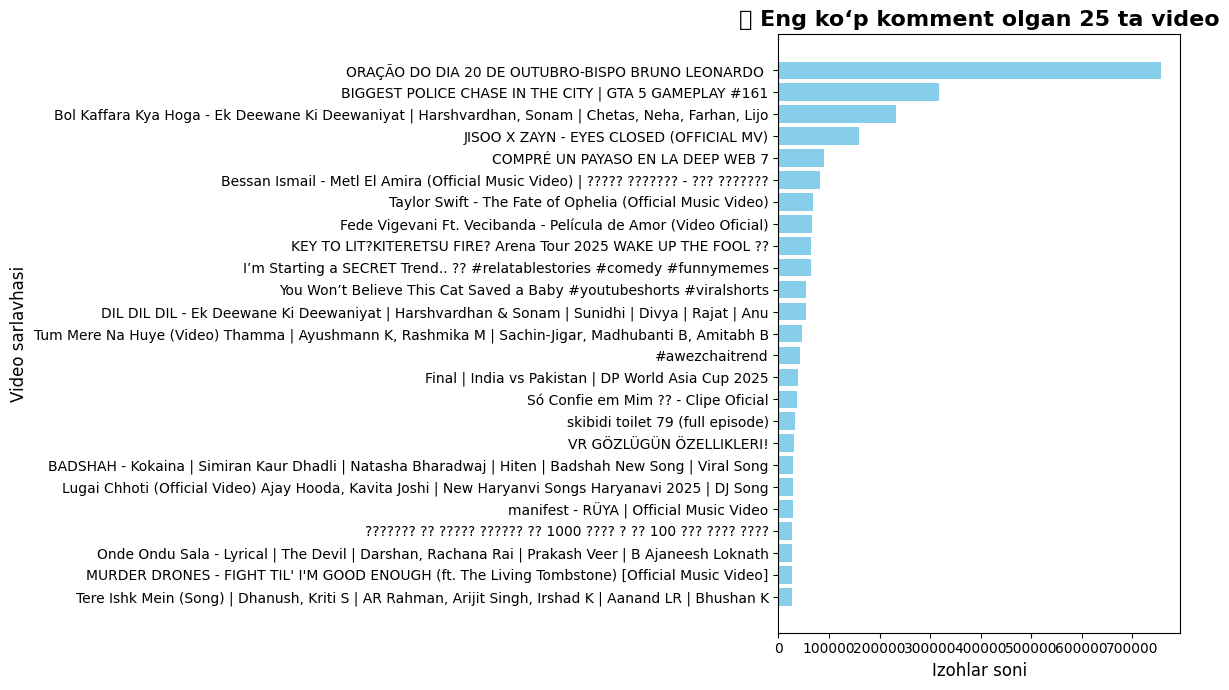

In [17]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 💬 Eng ko‘p komment olgan 25 ta video
query = """
SELECT TOP 25 
    [Video Title], 
    [Channel], 
    CAST([Comments] AS BIGINT) AS CommentCount
FROM ClusteringData
WHERE ISNUMERIC([Comments]) = 1
ORDER BY CAST([Comments] AS BIGINT) DESC
"""

# 🔽 Ma’lumotni olish
df_top_comments = pd.read_sql(query, engine)

# 🎨 Grafik chizish
plt.figure(figsize=(12, 7))
plt.barh(df_top_comments['Video Title'][:25], df_top_comments['CommentCount'][:25], color='skyblue')
plt.gca().invert_yaxis()  # Eng ko‘p komment olgan videoni tepada chiqarish
plt.title("💬 Eng ko‘p komment olgan 25 ta video", fontsize=16, fontweight='bold')
plt.xlabel("Izohlar soni", fontsize=12)
plt.ylabel("Video sarlavhasi", fontsize=12)
plt.tight_layout()

plt.show()


# 2025-yil Sentabr oyi bo‘yicha YouTube tahlili

In [20]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 🗓 2025-yil sentabr oyi bo‘yicha ko‘rishlar
query = """
SELECT 
    TRY_CAST([Published Date] AS DATE) AS PublishDate,
    [Video Title],
    [Channel],
    CAST([Views] AS BIGINT) AS Views
FROM ClusteringData
WHERE 
    TRY_CAST([Published Date] AS DATE) BETWEEN '2025-09-01' AND '2025-09-30'
    AND ISNUMERIC([Views]) = 1
"""

df_september = pd.read_sql(query, engine)

# 🔍 Ma'lumotni tekshirish
if df_september.empty:
    print("❌ 2025-yil sentabr oyi uchun video ma'lumot topilmadi.")
else:
    print(f"✅ {len(df_september)} ta video ma'lumot topildi.")
    
    # 📈 Har bir kun uchun jami ko‘rishlar
    daily_views = df_september.groupby('PublishDate', as_index=False)['Views'].sum()

    # --- 📊 Grafik 1: Kunlik ko‘rishlar dinamikasi ---
    fig1 = px.bar(
        daily_views,
        x='PublishDate',
        y='Views',
        text='Views',
        title='📆 2025-yil Sentabr — Kunlik Jami Ko‘rishlar',
    )
    fig1.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig1.update_layout(
        xaxis_title='Sana',
        yaxis_title='Ko‘rishlar soni',
        xaxis_tickangle=-45,
        title_font_size=20,
        showlegend=False
    )
    fig1.show()

    # --- 🔝 Eng ko‘p ko‘rilgan 5 ta video ---
    top5_videos = df_september.nlargest(5, 'Views')

    fig2 = px.bar(
        top5_videos,
        x='Video Title',
        y='Views',
        color='Channel',
        text='Views',
        title='🔥 2025-yil Sentabr — Eng Ko‘p Ko‘rilgan 5 ta Video',
    )
    fig2.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig2.update_layout(
        xaxis_title='Video nomi',
        yaxis_title='Ko‘rishlar soni',
        xaxis_tickangle=-45,
        showlegend=True
    )
    fig2.show()


✅ 167 ta video ma'lumot topildi.


# 2025-yil Oktyabr oyi bo‘yicha YouTube tahlili

In [21]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 🗓 2025-yil oktyabr oyi bo‘yicha ma’lumot
query = """
SELECT 
    TRY_CAST([Published Date] AS DATE) AS PublishDate,
    [Video Title],
    [Channel],
    CAST([Views] AS BIGINT) AS Views
FROM ClusteringData
WHERE 
    TRY_CAST([Published Date] AS DATE) BETWEEN '2025-10-01' AND '2025-10-31'
    AND ISNUMERIC([Views]) = 1
"""

df_october = pd.read_sql(query, engine)

# 🔍 Ma'lumotni tekshirish
if df_october.empty:
    print("❌ 2025-yil oktyabr oyi uchun video ma'lumot topilmadi.")
else:
    print(f"✅ {len(df_october)} ta video ma'lumot topildi.")

    # 📆 Har bir kun uchun jami ko‘rishlar
    daily_views = df_october.groupby('PublishDate', as_index=False)['Views'].sum()

    # --- 📊 Grafik 1: Kunlik ko‘rishlar dinamikasi ---
    fig1 = px.bar(
        daily_views,
        x='PublishDate',
        y='Views',
        text='Views',
        title='📆 2025-yil Oktyabr — Kunlik Jami Ko‘rishlar',
    )
    fig1.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig1.update_layout(
        xaxis_title='Sana',
        yaxis_title='Ko‘rishlar soni',
        xaxis_tickangle=-45,
        title_font_size=20,
        showlegend=False
    )
    fig1.show()

    # --- 🔝 Eng ko‘p ko‘rilgan 5 ta video ---
    top5_videos = df_october.nlargest(5, 'Views')

    fig2 = px.bar(
        top5_videos,
        x='Video Title',
        y='Views',
        color='Channel',
        text='Views',
        title='🔥 2025-yil Oktyabr — Eng Ko‘p Ko‘rilgan 5 ta Video',
    )
    fig2.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig2.update_layout(
        xaxis_title='Video nomi',
        yaxis_title='Ko‘rishlar soni',
        xaxis_tickangle=-45,
        showlegend=True
    )
    fig2.show()


✅ 8326 ta video ma'lumot topildi.


# Trendda bo‘lgan davrlar (Views keskin oshgan kunlar)

In [ ]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 📊 SQL: kunlik jami Views va oldingi kunga nisbatan o‘sish
query = """
WITH DailyViews AS (
    SELECT 
        TRY_CAST([Published Date] AS DATE) AS ViewDate,
        SUM(CAST(Views AS BIGINT)) AS TotalViews
    FROM ClusteringData
    WHERE ISNUMERIC(Views) = 1
    GROUP BY TRY_CAST([Published Date] AS DATE)
)
SELECT 
    ViewDate,
    TotalViews,
    LAG(TotalViews) OVER (ORDER BY ViewDate) AS PrevViews,
    (TotalViews - LAG(TotalViews) OVER (ORDER BY ViewDate)) AS Diff,
    CASE 
        WHEN LAG(TotalViews) OVER (ORDER BY ViewDate) > 0 THEN 
            (TotalViews - LAG(TotalViews) OVER (ORDER BY ViewDate)) * 100.0 /
            LAG(TotalViews) OVER (ORDER BY ViewDate)
        ELSE NULL
    END AS GrowthPercent
FROM DailyViews
ORDER BY ViewDate;
"""

# WITH DailyViews AS (...) Bu — CTE (Common Table Expression) deyiladi. Ya’ni, vaqtinchalik jadval yaratilyapti (DailyViews nomli). 
# Bu “ichki hisob-kitob” natijasini keyingi SELECT’da ishlatish uchun.

# LAG(column) OVER (ORDER BY something) — bu avvalgi qatordagi qiymatni olib keladi. Bu “window function” deyiladi.

# DIFF Har bir kunning ko‘rish soni o‘sishini hisoblaydi:  Diff = Bugungi - Kechagi

# case  Bu o‘sish foizini hisoblaydi.  // \text{Growth %} = \frac{(Bugungi - Kechagi)}{Kechagi} \times 100


df_trend = pd.read_sql(query, engine)

if df_trend.empty:
    print("❌ Ma'lumot topilmadi.")
else:
    print(f"✅ {len(df_trend)} kunlik ma'lumot topildi.")

    # --- 📈 Grafik 1: Kunlik jami ko‘rishlar ---
    fig1 = px.line(
        df_trend,
        x='ViewDate',
        y='TotalViews',
        markers=True,
        title='📆 Kunlik jami ko‘rishlar (Trend kuzatuvi)',
    )
    fig1.update_layout(xaxis_title='Sana', yaxis_title='Ko‘rishlar soni')
    fig1.show()

    # --- 📊 Grafik 2: O‘sish foizi (keskin o‘sishlarni ajratib ko‘rsatish) ---
    df_trend['IsSpike'] = df_trend['GrowthPercent'] > 50  # 50% dan ortiq o‘sish
    fig2 = px.bar(
        df_trend,
        x='ViewDate',
        y='GrowthPercent',
        color='IsSpike',
        color_discrete_map={True: 'crimson', False: 'lightblue'},
        title='📊 Kunlik o‘sish foizi (Trenddagi kunlar qizil bilan)',
    )
    fig2.update_layout(xaxis_title='Sana', yaxis_title='O‘sish (%)')
    fig2.show()


✅ 37 kunlik ma'lumot topildi.


# “Publishing time” (Ertalab vs Kechqurun tahlili)

In [39]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 🧩 SQL: Video joylangan soatni ajratamiz va vaqt oralig‘iga bo‘lamiz
query = """
WITH PublishHour AS (
    SELECT
        [Video Title],
        [Channel],
        DATEPART(HOUR, TRY_CAST([Published Date] AS DATETIME)) AS Hour,
        CAST(Views AS BIGINT) AS Views
    FROM ClusteringData
    WHERE ISNUMERIC(Views) = 1
)
SELECT
    CASE 
        WHEN Hour BETWEEN 5 AND 11 THEN 'Ertalab (05:00–11:59)'
        WHEN Hour BETWEEN 12 AND 17 THEN 'Tush (12:00–17:59)'
        WHEN Hour BETWEEN 18 AND 22 THEN 'Kechqurun (18:00–22:59)'
        ELSE 'Tun (23:00–04:59)'
    END AS TimePeriod,
    COUNT(*) AS VideoCount,
    AVG(Views) AS AvgViews,
    SUM(Views) AS TotalViews
FROM PublishHour
GROUP BY 
    CASE 
        WHEN Hour BETWEEN 5 AND 11 THEN 'Ertalab (05:00–11:59)'
        WHEN Hour BETWEEN 12 AND 17 THEN 'Tush (12:00–17:59)'
        WHEN Hour BETWEEN 18 AND 22 THEN 'Kechqurun (18:00–22:59)'
        ELSE 'Tun (23:00–04:59)'
    END
ORDER BY TotalViews DESC;
"""

df_time = pd.read_sql(query, engine)

if df_time.empty:
    print("❌ Ma'lumot topilmadi.")
else:
    print("✅ Publishing time tahlil ma’lumotlari tayyor.")
    display(df_time)

    # --- 📊 Grafik 1: Har bir vaqt oralig‘ida nechta video joylangan ---
    fig1 = px.bar(
        df_time,
        x='TimePeriod',
        y='VideoCount',
        text='VideoCount',
        title='📊 Videolar soni — Joylangan vaqt oralig‘iga ko‘ra',
        color='TimePeriod'
    )
    fig1.update_traces(textposition='outside')
    fig1.update_layout(
        xaxis_title='Vaqt oralig‘i',
        yaxis_title='Videolar soni',
        showlegend=False
    )
    fig1.show()

    # --- 📈 Grafik 2: O‘rtacha ko‘rishlar (Views) vaqt oralig‘iga ko‘ra ---
    fig2 = px.bar(
        df_time,
        x='TimePeriod',
        y='AvgViews',
        text='AvgViews',
        title='📈 O‘rtacha ko‘rishlar — Joylangan vaqt oralig‘iga ko‘ra',
        color='TimePeriod'
    )
    fig2.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig2.update_layout(
        xaxis_title='Vaqt oralig‘i',
        yaxis_title='O‘rtacha Views soni',
        showlegend=False
    )
    fig2.show()


✅ Publishing time tahlil ma’lumotlari tayyor.


,TimePeriod,VideoCount,AvgViews,TotalViews
0,Tush (12:00–17:59),3174,3164877,10045320857
1,Ertalab (05:00–11:59),2641,3651735,9644234601
2,Tun (23:00–04:59),1368,4035469,5520521729
3,Kechqurun (18:00–22:59),1310,3245804,4252004126


# Eng ko‘p Views, Likes, Comments olgan kategoriyalar

In [40]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 🧩 SQL so‘rov: Har bir kategoriya bo‘yicha Views, Likes, Comments yig‘indisini hisoblaymiz
query = """
SELECT 
    [CategoryName],
    SUM(CAST(Views AS BIGINT)) AS TotalViews,
    SUM(CAST(Likes AS BIGINT)) AS TotalLikes,
    SUM(CAST(Comments AS BIGINT)) AS TotalComments
FROM ClusteringData
WHERE 
    ISNUMERIC(Views) = 1 AND 
    ISNUMERIC(Likes) = 1 AND 
    ISNUMERIC(Comments) = 1
GROUP BY [CategoryName]
ORDER BY TotalViews DESC;
"""

df_cat = pd.read_sql(query, engine)

if df_cat.empty:
    print("❌ Ma'lumot topilmadi.")
else:
    print("✅ Kategoriya bo‘yicha Views, Likes, Comments tahlili tayyor.")
    display(df_cat.head())

    # --- 📊 Grafik 1: Eng ko‘p ko‘rilgan kategoriyalar ---
    fig1 = px.bar(
        df_cat.head(10),
        x='CategoryName',
        y='TotalViews',
        text='TotalViews',
        title='🔥 Eng Ko‘p Ko‘rilgan 10 ta Kategoriya',
        color='CategoryName'
    )
    fig1.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig1.update_layout(
        xaxis_title='Kategoriya nomi',
        yaxis_title='Jami ko‘rishlar (Views)',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig1.show()

    # --- 💖 Grafik 2: Eng ko‘p Like olgan kategoriyalar ---
    fig2 = px.bar(
        df_cat.sort_values('TotalLikes', ascending=False).head(10),
        x='CategoryName',
        y='TotalLikes',
        text='TotalLikes',
        title='💖 Eng Ko‘p Like Olgan 10 ta Kategoriya',
        color='CategoryName'
    )
    fig2.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig2.update_layout(
        xaxis_title='Kategoriya nomi',
        yaxis_title='Jami layklar (Likes)',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig2.show()

    # --- 💬 Grafik 3: Eng ko‘p Komment olgan kategoriyalar ---
    fig3 = px.bar(
        df_cat.sort_values('TotalComments', ascending=False).head(10),
        x='CategoryName',
        y='TotalComments',
        text='TotalComments',
        title='💬 Eng Ko‘p Izoh Olgan 10 ta Kategoriya',
        color='CategoryName'
    )
    fig3.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig3.update_layout(
        xaxis_title='Kategoriya nomi',
        yaxis_title='Jami izohlar (Comments)',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig3.show()


✅ Kategoriya bo‘yicha Views, Likes, Comments tahlili tayyor.


,CategoryName,TotalViews,TotalLikes,TotalComments
0,Howto & Style,6771214617,92124125,1330215
1,Film & Animation,5451074014,90157465,505576
2,Entertainment,4945823910,63159904,712908
3,Sports,2738507218,42028587,451417
4,Autos & Vehicles,2577726411,34024575,373598


# Har bir kategoriya ichida o‘rtacha Views per video

In [41]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 🧩 SQL so‘rov: har bir CategoryName uchun o‘rtacha Views hisoblash
query = """
SELECT 
    [CategoryName],
    COUNT([Video ID]) AS VideoCount,
    AVG(CAST(Views AS BIGINT)) AS AvgViews,
    SUM(CAST(Views AS BIGINT)) AS TotalViews
FROM ClusteringData
WHERE ISNUMERIC(Views) = 1
GROUP BY [CategoryName]
ORDER BY AvgViews DESC;
"""

df_avg = pd.read_sql(query, engine)

if df_avg.empty:
    print("❌ Ma'lumot topilmadi.")
else:
    print("✅ Har bir kategoriya uchun o‘rtacha Views tahlili tayyor.")
    display(df_avg.head(10))

    # --- 📊 Grafik: Kategoriyalar bo‘yicha o‘rtacha Views ---
    fig = px.bar(
        df_avg.head(10),
        x='CategoryName',
        y='AvgViews',
        text='AvgViews',
        color='CategoryName',
        title='📺 Har bir Kategoriya uchun O‘rtacha Ko‘rishlar (Views per Video)'
    )

    fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig.update_layout(
        xaxis_title='Kategoriya nomi',
        yaxis_title='O‘rtacha ko‘rishlar soni',
        xaxis_tickangle=-45,
        showlegend=False
    )

    fig.show()


✅ Har bir kategoriya uchun o‘rtacha Views tahlili tayyor.


,CategoryName,VideoCount,AvgViews,TotalViews
0,Entertainment,534,9261842,4945823910
1,Howto & Style,872,7765154,6771214617
2,Film & Animation,946,5762234,5451074014
3,Comedy,543,4598731,2497111059
4,Autos & Vehicles,685,3763104,2577726411
5,Sports,826,3315384,2738507218
6,Science & Technology,603,2497268,1505852633
7,Music,756,2431930,1838539671
8,News & Politics,1299,521237,677087247
9,Gaming,1120,339901,380689457


# Har bir davlat bo‘yicha Views va Likes

In [42]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 🌍 SQL so‘rov: Har bir davlat bo‘yicha jami va o‘rtacha Views/Likes
query = """
SELECT 
    [Country],
    COUNT([Video ID]) AS VideoCount,
    SUM(CAST(Views AS BIGINT)) AS TotalViews,
    SUM(CAST(Likes AS BIGINT)) AS TotalLikes,
    AVG(CAST(Views AS BIGINT)) AS AvgViews,
    AVG(CAST(Likes AS BIGINT)) AS AvgLikes
FROM ClusteringData
WHERE ISNUMERIC(Views) = 1 AND ISNUMERIC(Likes) = 1
GROUP BY [Country]
ORDER BY TotalViews DESC;
"""

df_country = pd.read_sql(query, engine)

if df_country.empty:
    print("❌ Ma'lumot topilmadi.")
else:
    print("✅ Har bir davlat bo‘yicha Views & Likes tahlili tayyor.")
    display(df_country.head(10))

    # --- 📊 Grafik 1: Davlatlar bo‘yicha jami Views ---
    fig1 = px.bar(
        df_country.head(10),
        x='Country',
        y='TotalViews',
        text='TotalViews',
        color='Country',
        title='🌍 Eng Ko‘p Ko‘rilgan Davlatlar (Jami Views)',
    )
    fig1.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig1.update_layout(
        xaxis_title='Davlat',
        yaxis_title='Jami ko‘rishlar soni',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig1.show()

    # --- 📊 Grafik 2: Davlatlar bo‘yicha o‘rtacha Likes ---
    fig2 = px.bar(
        df_country.head(10),
        x='Country',
        y='AvgLikes',
        text='AvgLikes',
        color='Country',
        title='👍 Davlatlar bo‘yicha O‘rtacha Layklar',
    )
    fig2.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig2.update_layout(
        xaxis_title='Davlat',
        yaxis_title='O‘rtacha layklar soni',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig2.show()


✅ Har bir davlat bo‘yicha Views & Likes tahlili tayyor.


,Country,VideoCount,TotalViews,TotalLikes,AvgViews,AvgLikes
0,Noma’lum,1649,7193851946,109797604,4362554,66584
1,IN,552,5281954236,57561631,9568757,104278
2,US,844,5255581553,88089346,6226992,104371
3,ID,224,1030075560,11655741,4598551,52034
4,BR,292,998029481,17805270,3417909,60976
5,JP,262,815934502,12641806,3114253,48251
6,KR,275,805866097,10844703,2930422,39435
7,TR,260,675777992,7772912,2599146,29895
8,VN,230,560446589,4911467,2436724,21354
9,GB,167,487445529,8258617,2918835,49452


# Eng faol tomoshabinlar mamlakati

In [43]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 👀 SQL so‘rov: Eng faol tomoshabinlar mamlakati
query = """
SELECT 
    [Country],
    SUM(CAST(Views AS BIGINT)) AS TotalViews,
    SUM(CAST(Likes AS BIGINT)) AS TotalLikes,
    SUM(CAST(Comments AS BIGINT)) AS TotalComments
FROM ClusteringData
WHERE ISNUMERIC(Views) = 1 AND ISNUMERIC(Likes) = 1 AND ISNUMERIC(Comments) = 1
GROUP BY [Country]
ORDER BY TotalViews DESC;
"""

df_active_countries = pd.read_sql(query, engine)

if df_active_countries.empty:
    print("❌ Ma'lumot topilmadi.")
else:
    print("✅ Eng faol tomoshabinlar mamlakati tahlili tayyor.")
    display(df_active_countries.head(10))

    # --- 📊 Grafik: Eng faol 10 ta mamlakat (Views bo‘yicha) ---
    fig = px.bar(
        df_active_countries.head(10),
        x='Country',
        y='TotalViews',
        text='TotalViews',
        color='Country',
        title='🌍 Eng Faol Tomoshabinlar Mamlakati (Jami Views bo‘yicha)',
    )
    fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig.update_layout(
        xaxis_title='Davlat',
        yaxis_title='Jami ko‘rishlar soni',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig.show()

    # --- 📊 Grafik 2: Likes va Comments taqqoslanishi ---
    fig2 = px.scatter(
        df_active_countries.head(15),
        x='TotalLikes',
        y='TotalComments',
        size='TotalViews',
        color='Country',
        title='💬 Likes va Comments o‘rtasidagi bog‘liqlik (Davlatlar kesimida)',
        hover_name='Country',
        size_max=60
    )
    fig2.update_layout(
        xaxis_title='Layklar soni',
        yaxis_title='Kommentlar soni'
    )
    fig2.show()
    


✅ Eng faol tomoshabinlar mamlakati tahlili tayyor.


,Country,TotalViews,TotalLikes,TotalComments
0,Noma’lum,7193851946,109797604,1290780
1,IN,5281954236,57561631,1286096
2,US,5255581553,88089346,1187141
3,ID,1030075560,11655741,136204
4,BR,998029481,17805270,953633
5,JP,815934502,12641806,297875
6,KR,805866097,10844703,404982
7,TR,675777992,7772912,230668
8,VN,560446589,4911467,150268
9,GB,487445529,8258617,213025


# Mintaqalar kesimida trend farqlari

In [44]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 🌍 SQL so‘rov: Mintaqalar bo‘yicha Views, Likes, Comments
query = """
SELECT 
    [Region],
    SUM(CAST(Views AS BIGINT)) AS TotalViews,
    SUM(CAST(Likes AS BIGINT)) AS TotalLikes,
    SUM(CAST(Comments AS BIGINT)) AS TotalComments,
    COUNT(*) AS VideoCount
FROM ClusteringData
WHERE ISNUMERIC(Views) = 1 AND ISNUMERIC(Likes) = 1 AND ISNUMERIC(Comments) = 1
GROUP BY [Region]
ORDER BY TotalViews DESC;
"""

df_region_trends = pd.read_sql(query, engine)

if df_region_trends.empty:
    print("❌ Ma'lumot topilmadi.")
else:
    print("✅ Mintaqalar kesimida trend tahlili tayyor.")
    display(df_region_trends)

    # --- 📊 Grafik 1: Mintaqalar bo‘yicha jami Views ---
    fig1 = px.bar(
        df_region_trends,
        x='Region',
        y='TotalViews',
        text='TotalViews',
        color='Region',
        title='🌎 Mintaqalar bo‘yicha jami ko‘rishlar soni',
    )
    fig1.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig1.update_layout(
        xaxis_title='Mintaqa',
        yaxis_title='Jami ko‘rishlar',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig1.show()

    # --- 📊 Grafik 2: Likes va Comments o‘rtacha qiymatlari ---
    df_region_trends['AvgLikes'] = df_region_trends['TotalLikes'] / df_region_trends['VideoCount']
    df_region_trends['AvgComments'] = df_region_trends['TotalComments'] / df_region_trends['VideoCount']

    fig2 = px.scatter(
        df_region_trends,
        x='AvgLikes',
        y='AvgComments',
        size='TotalViews',
        color='Region',
        hover_name='Region',
        title='💬 Mintaqalar kesimida Likes va Comments o‘rtacha taqqoslanishi',
        size_max=60
    )
    fig2.update_layout(
        xaxis_title='O‘rtacha Likes',
        yaxis_title='O‘rtacha Comments'
    )
    fig2.show()


✅ Mintaqalar kesimida trend tahlili tayyor.


,Region,TotalViews,TotalLikes,TotalComments,VideoCount
0,AU,3502355226,77426353,1164426,344
1,PK,2647089501,21241909,207890,236
2,EG,1846083044,17836464,137834,295
3,BD,1724325127,16754184,729594,264
4,PE,1659999719,33652665,393828,269
5,MY,1596939353,17592186,211143,212
6,IN,1432125946,22924197,318008,255
7,PL,1091560924,13200408,259184,291
8,BR,991432607,19215360,948696,289
9,RU,857731316,12203919,283423,283


# Har bir kanal bo‘yicha tahlil

In [45]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 🧠 SQL so‘rov: har bir kanal uchun statistikalar
query = """
SELECT 
    [Channel],
    COUNT(*) AS VideoCount,
    AVG(CAST(Views AS BIGINT)) AS AvgViews,
    AVG(CAST(Likes AS BIGINT)) AS AvgLikes,
    AVG(CAST(Comments AS BIGINT)) AS AvgComments,
    MAX(CAST(Views AS BIGINT)) AS MaxViews
FROM ClusteringData
WHERE ISNUMERIC(Views) = 1 AND ISNUMERIC(Likes) = 1 AND ISNUMERIC(Comments) = 1
GROUP BY [Channel]
ORDER BY AvgViews DESC;
"""

df_channel_stats = pd.read_sql(query, engine)

if df_channel_stats.empty:
    print("❌ Kanal bo‘yicha ma'lumot topilmadi.")
else:
    print("✅ Kanal bo‘yicha tahlil tayyor.")
    display(df_channel_stats.head(10))

    # --- 📊 Grafik 1: Eng ko‘p o‘rtacha Views olgan 10 ta kanal ---
    top10_channels = df_channel_stats.nlargest(10, 'AvgViews')

    fig1 = px.bar(
        top10_channels,
        x='Channel',
        y='AvgViews',
        text='AvgViews',
        color='Channel',
        title='📺 Eng ko‘p o‘rtacha Views olgan 10 ta kanal',
    )
    fig1.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig1.update_layout(
        xaxis_title='Kanal nomi',
        yaxis_title='O‘rtacha Views',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig1.show()

# --- 🔝 Har bir kanalning eng mashhur videosini topish ---
query_top_videos = """
SELECT 
    c1.[Channel],
    c1.[Video Title],
    CAST(c1.[Views] AS BIGINT) AS Views
FROM ClusteringData c1
WHERE ISNUMERIC(c1.[Views]) = 1
AND CAST(c1.[Views] AS BIGINT) = (
    SELECT MAX(CAST(c2.[Views] AS BIGINT))
    FROM ClusteringData c2
    WHERE c2.[Channel] = c1.[Channel]
)
ORDER BY Views DESC;
"""

df_top_videos = pd.read_sql(query_top_videos, engine)

if df_top_videos.empty:
    print("❌ Eng mashhur videolar topilmadi.")
else:
    print("🎬 Har bir kanalning eng mashhur videolari:")
    display(df_top_videos.head(10))

    # --- 📊 Grafik 2: Har bir kanalning eng mashhur videolari (Views bo‘yicha) ---
    fig2 = px.bar(
        df_top_videos.nlargest(10, 'Views'),
        x='Channel',
        y='Views',
        color='Channel',
        text='Views',
        title='🔥 Har bir kanalning eng mashhur (ko‘p ko‘rilgan) 10 ta videosi'
    )
    fig2.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig2.update_layout(
        xaxis_title='Kanal nomi',
        yaxis_title='Ko‘rishlar soni',
        xaxis_tickangle=-45,
        showlegend=False
    )
    fig2.show()


✅ Kanal bo‘yicha tahlil tayyor.


,Channel,VideoCount,AvgViews,AvgLikes,AvgComments,MaxViews
0,Pouya Hashemi,1,161655701,893589,10608,161655701
1,Pimgo,1,135167139,619292,295,135167139
2,Frankie Lapenna,1,128092676,451906,2133,128092676
3,el kaiser YT,1,121675402,1207600,3538,121675402
4,Un Par de Ales,1,114047421,401616,160,114047421
5,Joint Reduction Simulation Lab,1,108524849,915292,2615,108524849
6,itsanzar,2,108159256,862054,10860,137295275
7,Cat Troubles,1,106111153,1059196,10804,106111153
8,LosWagners ESP,1,96077127,477809,288,96077127
9,Mai Mohini,1,93011208,1716617,1806,93011208


🎬 Har bir kanalning eng mashhur videolari:


,Channel,Video Title,Views
0,Pouya Hashemi,"Gainesville, FL doorbell camera captured the m...",161655701
1,John Nellis,"Find My Football, Win £1,000 ??",138739251
2,itsanzar,hero dog seved baby,137295275
3,Pimgo,PIMGO VIROU MINHOCA E ENTROU!,135167139
4,ISSEI / ????,?National Food?How to love Natto????@Tade,134137949
5,Frankie Lapenna,Corvette VS. people tied to chairs,128092676
6,el kaiser YT,desatorar fácil con esto ???,121675402
7,Un Par de Ales,Ballerina-Cappuccina Vol 2 ??,114047421
8,Joint Reduction Simulation Lab,“Would You Let a Rookie Reduce YOUR Shoulder?”...,108524849
9,Cat Troubles,Pitbull vs Bear to protect the owner #dogshort...,106111153


# Oylik o‘sish tahlili

In [46]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 🧠 SQL so‘rov: Har oy uchun jami Views, Likes, Comments
query = """
SELECT 
    YEAR(TRY_CAST([Published Date] AS DATE)) AS Year,
    MONTH(TRY_CAST([Published Date] AS DATE)) AS Month,
    SUM(CAST([Views] AS BIGINT)) AS TotalViews,
    SUM(CAST([Likes] AS BIGINT)) AS TotalLikes,
    SUM(CAST([Comments] AS BIGINT)) AS TotalComments
FROM ClusteringData
WHERE ISNUMERIC([Views]) = 1 AND ISNUMERIC([Likes]) = 1 AND ISNUMERIC([Comments]) = 1
GROUP BY YEAR(TRY_CAST([Published Date] AS DATE)), MONTH(TRY_CAST([Published Date] AS DATE))
ORDER BY Year, Month;
"""

df_monthly = pd.read_sql(query, engine)

if df_monthly.empty:
    print("❌ Oylik ma'lumotlar topilmadi.")
else:
    print("✅ Oylik jami statistikalar tayyor.")
    display(df_monthly)

    # 📆 Oylik sana ustuni
    df_monthly['MonthName'] = df_monthly['Year'].astype(str) + "-" + df_monthly['Month'].astype(str).str.zfill(2)

    # 📈 O‘sish foizlarini hisoblash
    df_monthly['ViewsGrowth_%'] = df_monthly['TotalViews'].pct_change() * 100
    df_monthly['LikesGrowth_%'] = df_monthly['TotalLikes'].pct_change() * 100
    df_monthly['CommentsGrowth_%'] = df_monthly['TotalComments'].pct_change() * 100

    # --- 📊 Grafik 1: Har oy uchun jami ko‘rishlar ---
    fig1 = px.line(
        df_monthly,
        x='MonthName',
        y='TotalViews',
        markers=True,
        title='📈 Oylik jami ko‘rishlar dinamikasi'
    )
    fig1.update_layout(
        xaxis_title='Oy',
        yaxis_title='Jami ko‘rishlar soni',
        xaxis_tickangle=-45
    )
    fig1.show()

    # --- 📊 Grafik 2: Har oy bo‘yicha o‘sish foizi ---
    fig2 = px.bar(
        df_monthly,
        x='MonthName',
        y='ViewsGrowth_%',
        text='ViewsGrowth_%',
        title='📊 Oylik ko‘rishlar o‘sish foizi (%)'
    )
    fig2.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig2.update_layout(
        xaxis_title='Oy',
        yaxis_title='O‘sish foizi (%)',
        xaxis_tickangle=-45
    )
    fig2.show()

    # --- 📊 Grafik 3: Likes va Comments uchun ---
    fig3 = px.line(
        df_monthly,
        x='MonthName',
        y=['TotalLikes', 'TotalComments'],
        markers=True,
        title='💬 Oylik Likes va Comments dinamikasi'
    )
    fig3.update_layout(
        xaxis_title='Oy',
        yaxis_title='Jami soni',
        xaxis_tickangle=-45
    )
    fig3.show()


✅ Oylik jami statistikalar tayyor.


,Year,Month,TotalViews,TotalLikes,TotalComments
0,2025,9,1348425873,20813669,772450
1,2025,10,28113655440,418707823,7840056


# “Anomaly” ustuni bo‘yicha tahlil

In [47]:
import pandas as pd
import plotly.express as px
from sqlalchemy import create_engine

# 🔗 SQL Server ulanish
engine = create_engine(
    "mssql+pyodbc://RASULBEK\\SQLEXPRESS/ProjectDB?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)

# 🧠 SQL so‘rov: Anomaly ustuni bo‘yicha o‘rtacha statistikalar
query = """
SELECT 
    [Anomaly],
    AVG(CAST([Views] AS BIGINT)) AS AvgViews,
    AVG(CAST([Likes] AS BIGINT)) AS AvgLikes,
    AVG(CAST([Comments] AS BIGINT)) AS AvgComments,
    COUNT(*) AS VideoCount
FROM ClusteringData
WHERE ISNUMERIC([Views]) = 1 
  AND ISNUMERIC([Likes]) = 1 
  AND ISNUMERIC([Comments]) = 1
GROUP BY [Anomaly];
"""

df_anomaly = pd.read_sql(query, engine)

if df_anomaly.empty:
    print("❌ Anomaly ma'lumotlari topilmadi.")
else:
    print("✅ Anomaly = 1 va 0 bo‘lgan videolar tahlili tayyor.")
    display(df_anomaly)

    # 🔢 'Anomaly' qiymatini matnga aylantiramiz
    df_anomaly['Anomaly'] = df_anomaly['Anomaly'].map({0: 'Normal', 1: 'Anomaly'})

    # --- 📊 Grafik 1: Views taqqoslanishi ---
    fig1 = px.bar(
        df_anomaly,
        x='Anomaly',
        y='AvgViews',
        text='AvgViews',
        title='👁️ O‘rtacha Views taqqoslanishi (Normal vs Anomaly)',
        color='Anomaly'
    )
    fig1.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig1.update_layout(yaxis_title='O‘rtacha Views', xaxis_title='Turi', showlegend=False)
    fig1.show()

    # --- 📊 Grafik 2: Likes taqqoslanishi ---
    fig2 = px.bar(
        df_anomaly,
        x='Anomaly',
        y='AvgLikes',
        text='AvgLikes',
        title='👍 O‘rtacha Likes taqqoslanishi',
        color='Anomaly'
    )
    fig2.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig2.update_layout(yaxis_title='O‘rtacha Likes', xaxis_title='Turi', showlegend=False)
    fig2.show()

    # --- 📊 Grafik 3: Comments taqqoslanishi ---
    fig3 = px.bar(
        df_anomaly,
        x='Anomaly',
        y='AvgComments',
        text='AvgComments',
        title='💬 O‘rtacha Comments taqqoslanishi',
        color='Anomaly'
    )
    fig3.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig3.update_layout(yaxis_title='O‘rtacha Comments', xaxis_title='Turi', showlegend=False)
    fig3.show()

    # --- 📊 Grafik 4: Anomaliya va normal videolar soni ---
    fig4 = px.pie(
        df_anomaly,
        names='Anomaly',
        values='VideoCount',
        title='🎯 Normal va Anomaly videolar ulushi'
    )
    fig4.show()


✅ Anomaly = 1 va 0 bo‘lgan videolar tahlili tayyor.


,Anomaly,AvgViews,AvgLikes,AvgComments,VideoCount
0,Normal,2623792,37971,622,8323
1,Anomaly,44848565,726403,20181,170
